# Matrix Plots

Matrix plots allow you to plot data as color-encoded matrices and can also be used to indicate clusters within the data (later in the machine learning section we will learn how to formally cluster data).

In [1]:
import seaborn as sns
%matplotlib inline

In [2]:
flights = sns.load_dataset('flights')

In [3]:
tips = sns.load_dataset('tips')

In [4]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [5]:
flights.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


## Heatmap

In order for a heatmap to work properly, your data should already be in a matrix form, the sns.heatmap function basically just colors it in for you. For example:

In [6]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [7]:
# Matrix form for correlation data
tips.corr()

,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


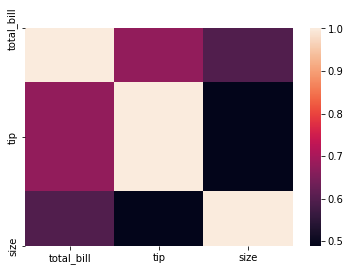

In [8]:
sns.heatmap(tips.corr())

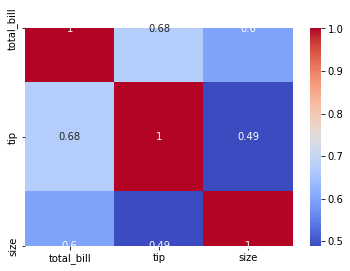

In [9]:
sns.heatmap(tips.corr(),cmap='coolwarm',annot=True)

Or for the flights data:

In [10]:
flights.pivot_table(values='passengers',index='month',columns='year')

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
Jan,112,115,145,171,196,204,242,284,315,340,360,417
Feb,118,126,150,180,196,188,233,277,301,318,342,391
Mar,132,141,178,193,236,235,267,317,356,362,406,419
Apr,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472
Jun,135,149,178,218,243,264,315,374,422,435,472,535
Jul,148,170,199,230,264,302,364,413,465,491,548,622
Aug,148,170,199,242,272,293,347,405,467,505,559,606
Sep,136,158,184,209,237,259,312,355,404,404,463,508


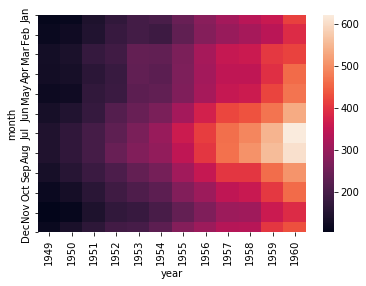

In [11]:
pvflights = flights.pivot_table(values='passengers',index='month',columns='year')
sns.heatmap(pvflights)

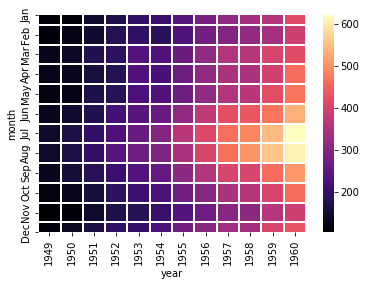

In [12]:
sns.heatmap(pvflights,cmap='magma',linecolor='white',linewidths=1)

## clustermap

The clustermap uses hierarchal clustering to produce a clustered version of the heatmap. For example:

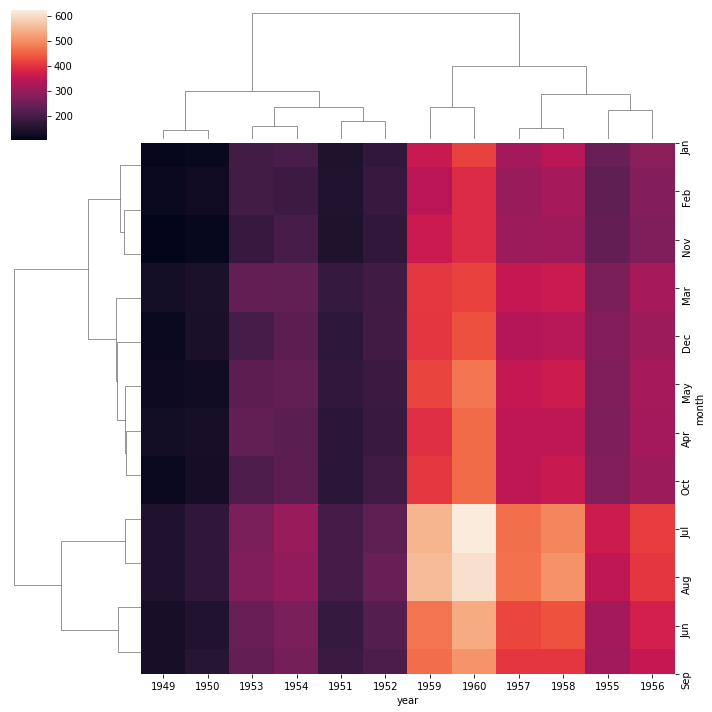

In [13]:
sns.clustermap(pvflights)

Notice now how the years and months are no longer in order, instead they are grouped by similarity in value (passenger count). That means we can begin to infer things from this plot, such as August and July being similar (makes sense, since they are both summer travel months)

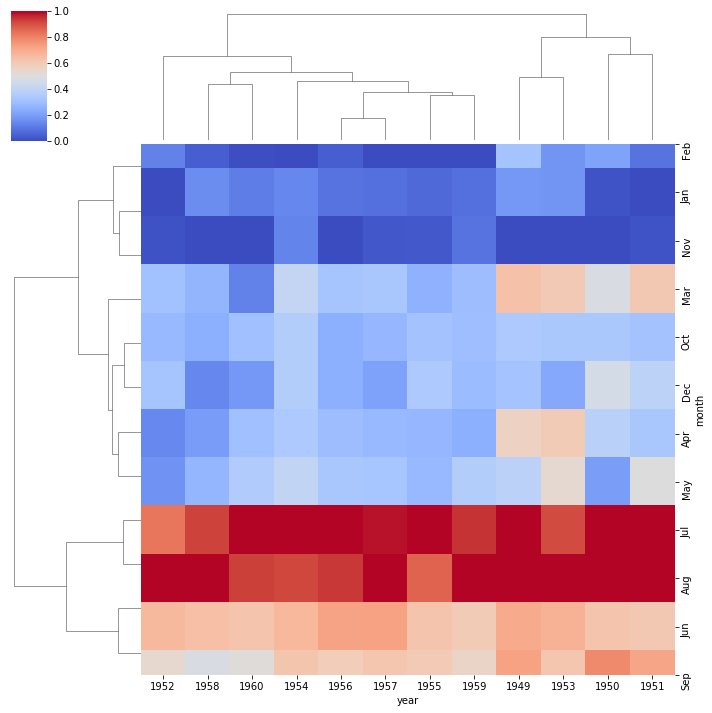

In [14]:
# More options to get the information a little clearer like normalization
sns.clustermap(pvflights,cmap='coolwarm',standard_scale=1)

# Grids

Grids are general types of plots that allow you to map plot types to rows and columns of a grid, this helps you create similar plots separated by features.

In [15]:
import matplotlib.pyplot as plt

In [16]:
iris = sns.load_dataset('iris')

In [17]:
iris.head()


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


## PairGrid

Pairgrid is a subplot grid for plotting pairwise relationships in a dataset.

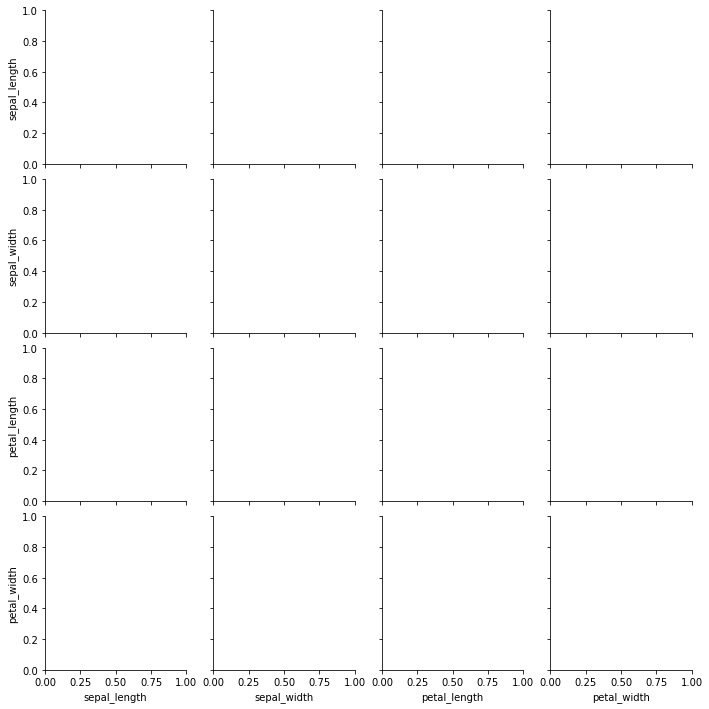

In [18]:
# Just the Grid
sns.PairGrid(iris)

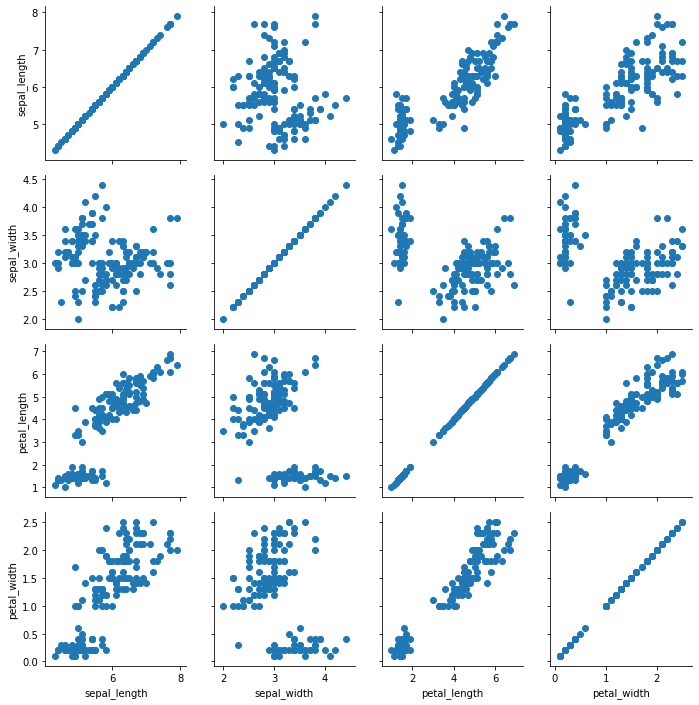

In [19]:
# Then you map to the grid
g = sns.PairGrid(iris)
g.map(plt.scatter)

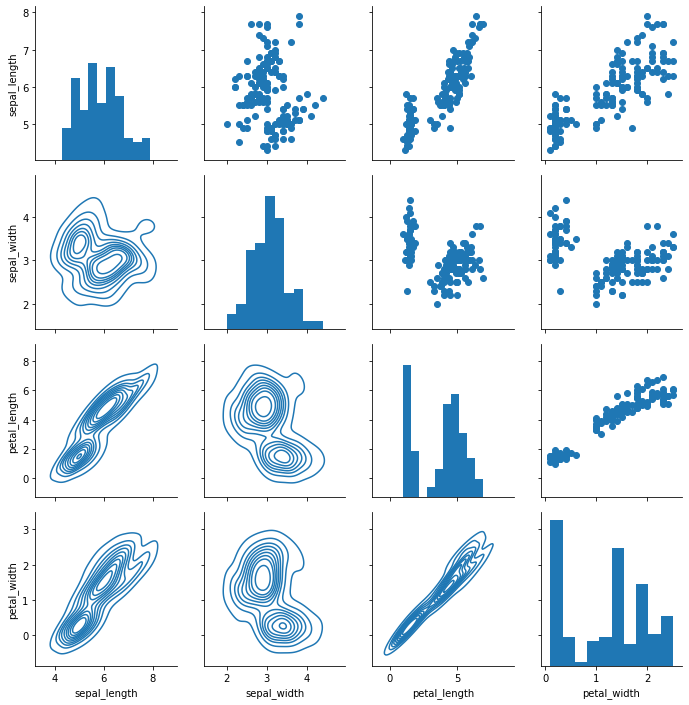

In [20]:
# Map to upper,lower, and diagonal
g = sns.PairGrid(iris)
g.map_diag(plt.hist)
g.map_upper(plt.scatter)
g.map_lower(sns.kdeplot)

## pairplot

pairplot is a simpler version of PairGrid (you'll use quite often)

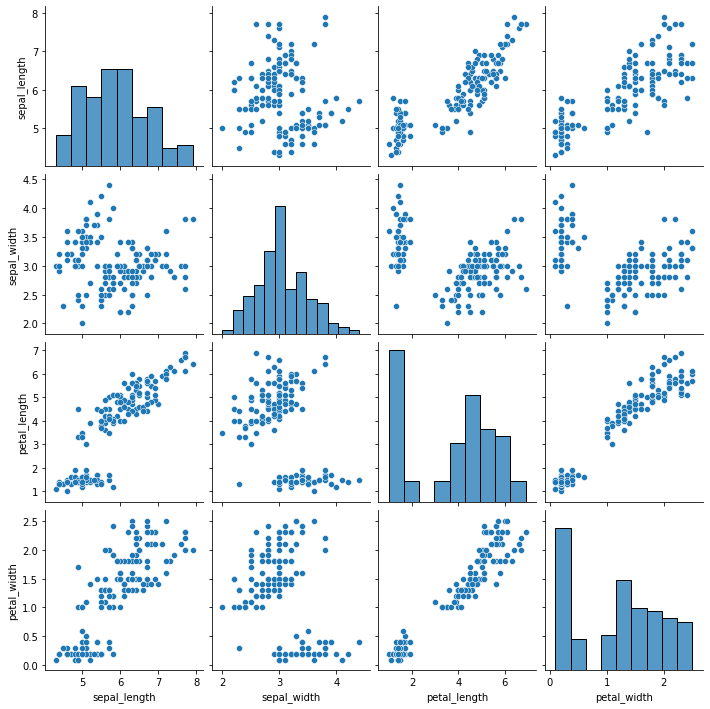

In [21]:
sns.pairplot(iris)

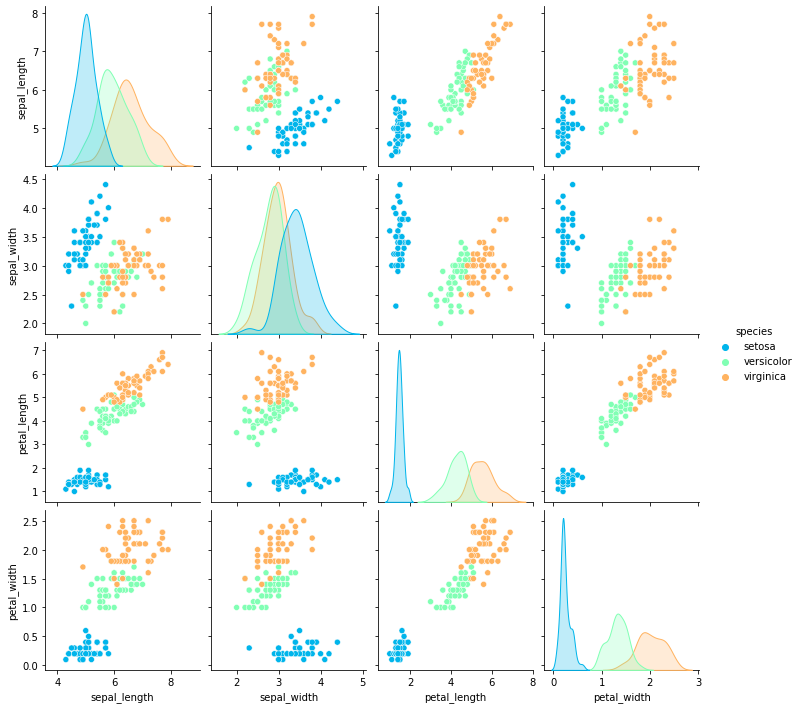

In [22]:
sns.pairplot(iris,hue='species',palette='rainbow')

## Facet Grid

FacetGrid is the general way to create grids of plots based off of a feature:

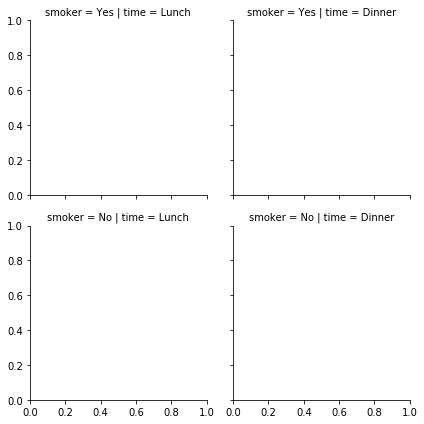

In [23]:
# Just the Grid
g = sns.FacetGrid(tips, col="time", row="smoker")

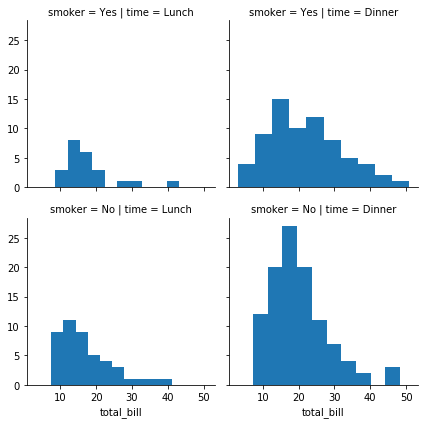

In [24]:
g = sns.FacetGrid(tips, col="time",  row="smoker")
g = g.map(plt.hist, "total_bill")

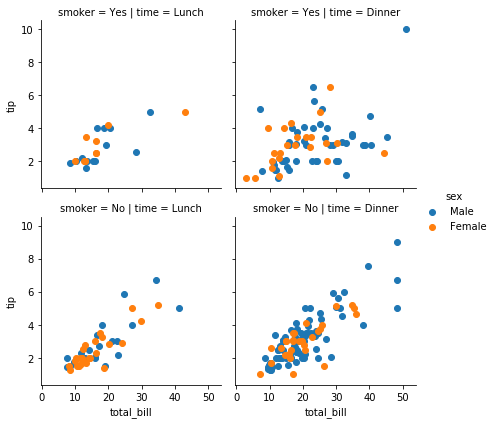

In [25]:
g = sns.FacetGrid(tips, col="time",  row="smoker",hue='sex')
# Notice hwo the arguments come after plt.scatter call
g = g.map(plt.scatter, "total_bill", "tip").add_legend()

## JointGrid

JointGrid is the general version for jointplot() type grids, for a quick example:

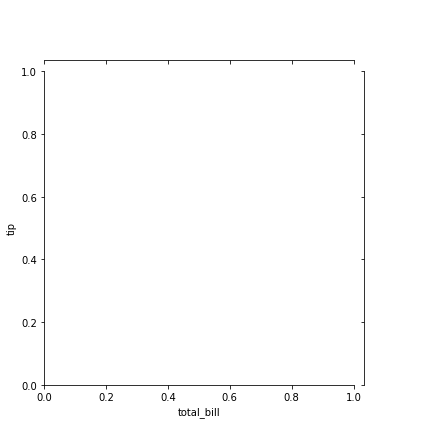

In [26]:
g = sns.JointGrid(x="total_bill", y="tip", data=tips)

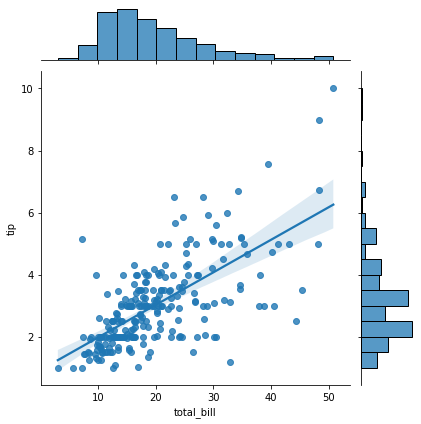

In [27]:
g = sns.JointGrid(x="total_bill", y="tip", data=tips)
g = g.plot(sns.regplot, sns.histplot)

# Regression Plots

Seaborn has many built-in capabilities for regression plots, however we won't really discuss regression until the machine learning section of the course, so we will only cover the **lmplot()** function for now.

**lmplot** allows you to display linear models, but it also conveniently allows you to split up those plots based off of features, as well as coloring the hue based off of features.

Let's explore how this works:

In [28]:
import seaborn as sns
%matplotlib inline

In [29]:
tips = sns.load_dataset('tips')

In [30]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


## lmplot()

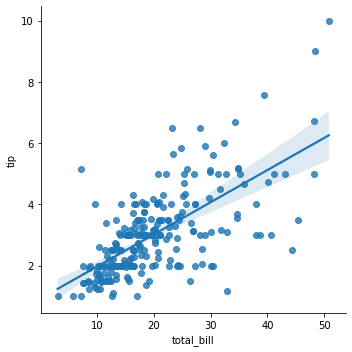

In [31]:
sns.lmplot(x='total_bill',y='tip',data=tips)

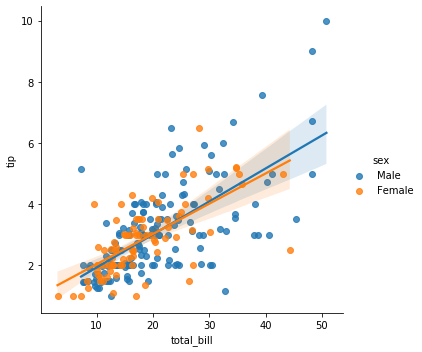

In [32]:
sns.lmplot(x='total_bill',y='tip',data=tips,hue='sex')

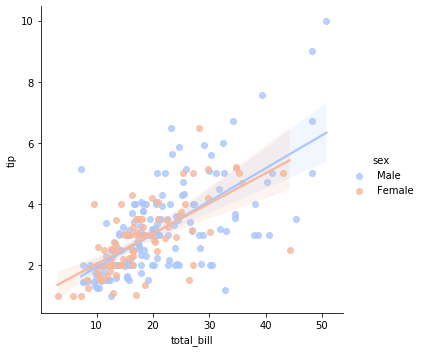

In [33]:
sns.lmplot(x='total_bill',y='tip',data=tips,hue='sex',palette='coolwarm')

### Working with Markers

lmplot kwargs get passed through to **regplot** which is a more general form of lmplot(). regplot has a scatter_kws parameter that gets passed to plt.scatter. So you want to set the s parameter in that dictionary, which corresponds (a bit confusingly) to the squared markersize. In other words you end up passing a dictionary with the base matplotlib arguments, in this case, s for size of a scatter plot. In general, you probably won't remember this off the top of your head, but instead reference the documentation.

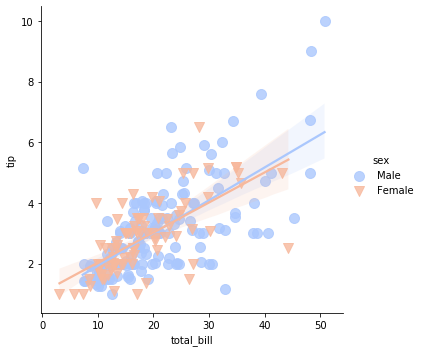

In [34]:
# http://matplotlib.org/api/markers_api.html
sns.lmplot(x='total_bill',y='tip',data=tips,hue='sex',palette='coolwarm',
           markers=['o','v'],scatter_kws={'s':100})

## Using a Grid

We can add more variable separation through columns and rows with the use of a grid. Just indicate this with the col or row arguments:

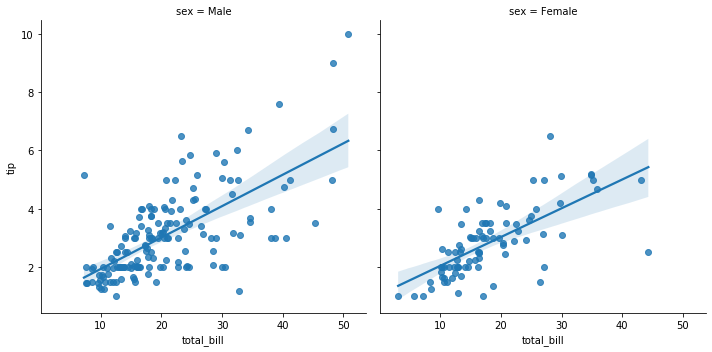

In [35]:
sns.lmplot(x='total_bill',y='tip',data=tips,col='sex')

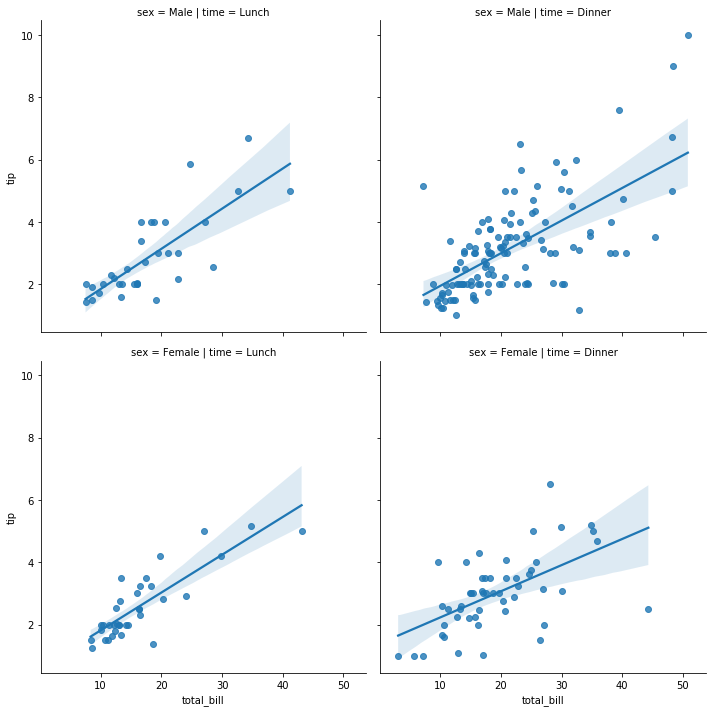

In [36]:
sns.lmplot(x="total_bill", y="tip", row="sex", col="time",data=tips)

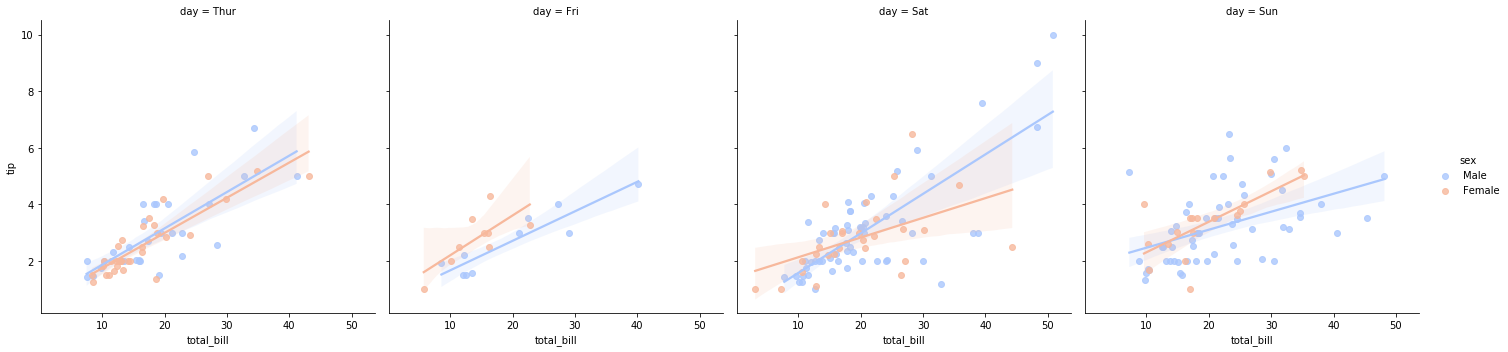

In [37]:
sns.lmplot(x='total_bill',y='tip',data=tips,col='day',hue='sex',palette='coolwarm')

## Aspect and Height

Seaborn figures can have their size and aspect ratio adjusted with the **size** and **aspect** parameters:

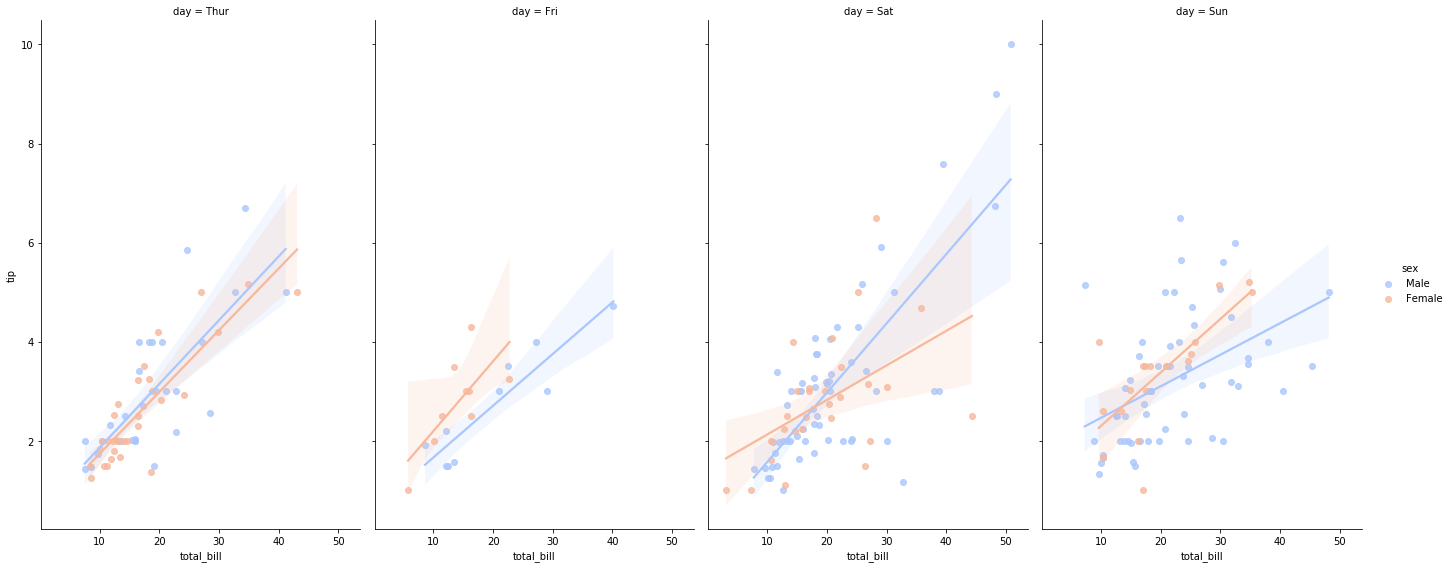

In [40]:
sns.lmplot(x='total_bill',y='tip',data=tips,col='day',hue='sex',palette='coolwarm',
          aspect=0.6, height = 8)

# Style and Color

We've shown a few times how to control figure aesthetics in seaborn, but let's now go over it formally:

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
tips = sns.load_dataset('tips')

## Styles

You can set particular styles:

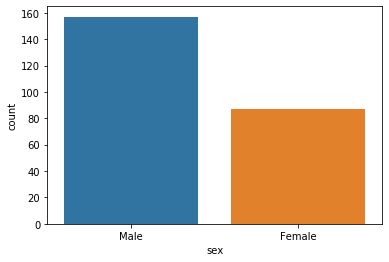

In [3]:
sns.countplot(x='sex',data=tips)

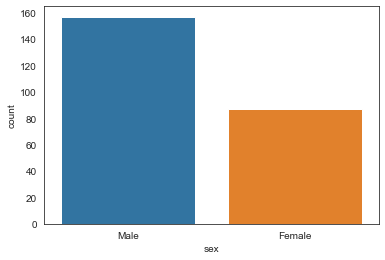

In [4]:
sns.set_style('white')
sns.countplot(x='sex',data=tips)

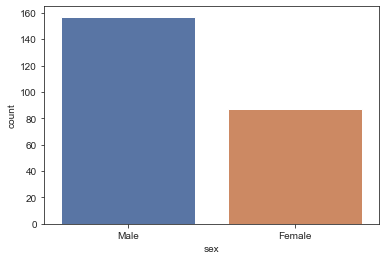

In [5]:
sns.set_style('ticks')
sns.countplot(x='sex',data=tips,palette='deep')

## Spine Removal

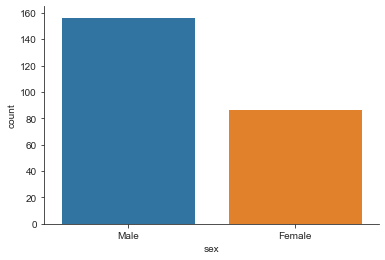

In [6]:
sns.countplot(x='sex',data=tips)
sns.despine()

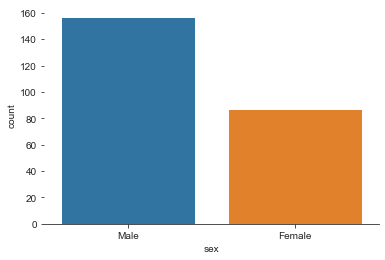

In [7]:
sns.countplot(x='sex',data=tips)
sns.despine(left=True)

## Size and Aspect

You can use matplotlib's **plt.figure(figsize=(width,height) ** to change the size of most seaborn plots.

You can control the size and aspect ratio of most seaborn grid plots by passing in parameters: size, and aspect. For example:

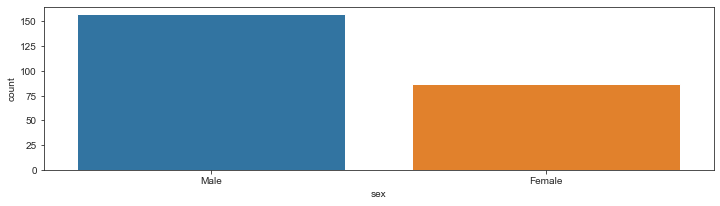

In [8]:
# Non Grid Plot
plt.figure(figsize=(12,3))
sns.countplot(x='sex',data=tips)

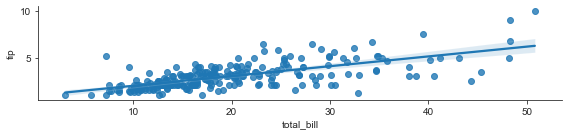

In [10]:
# Grid Type Plot
sns.lmplot(x='total_bill',y='tip',height=2,aspect=4,data=tips)

## Scale and Context

The set_context() allows you to override default parameters:

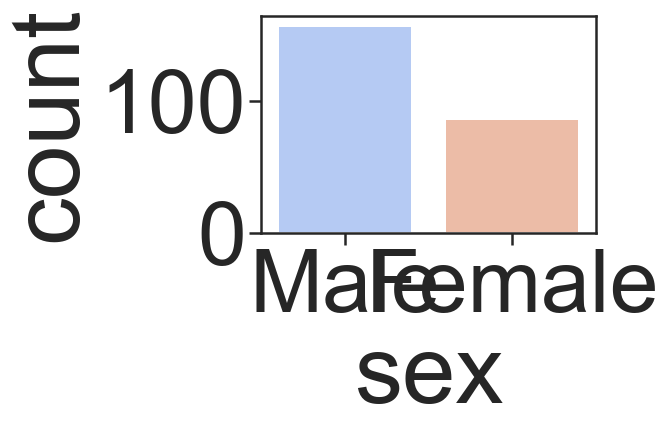

In [11]:
sns.set_context('poster',font_scale=4)
sns.countplot(x='sex',data=tips,palette='coolwarm')

Check out the documentation page for more info on these topics:
https://stanford.edu/~mwaskom/software/seaborn/tutorial/aesthetics.html

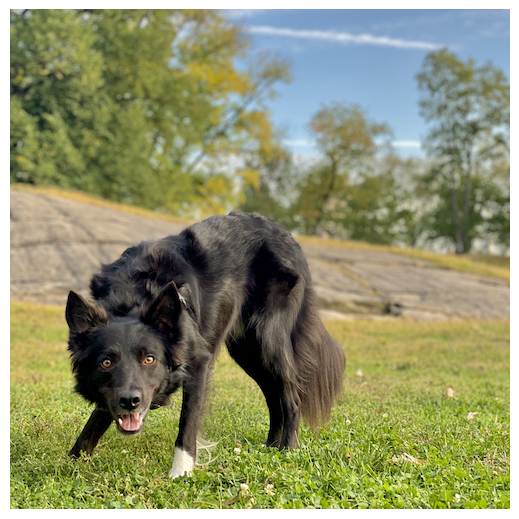

In [13]:
sns.dogplot()